In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Importing the boston house price data

In [3]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston',version=1,as_frame=True)

In [5]:
print(boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...  ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93    0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93    0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns], 'target': 0      

In [7]:
#loading in pandas dataframe
house_price_df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [10]:
#print first five rows
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [12]:
#add target (price) column to the dataframe
house_price_df['price'] = boston.target

In [13]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
house_price_df.shape

(506, 14)

In [15]:
#check for the missing values
house_price_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [16]:
#stastical measures of the dataset
house_price_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


##understanding the correlation between the various features in the dataset

1 = positive correlation


2 = negative correlation

In [17]:
correlation = house_price_df.corr()

<Axes: >

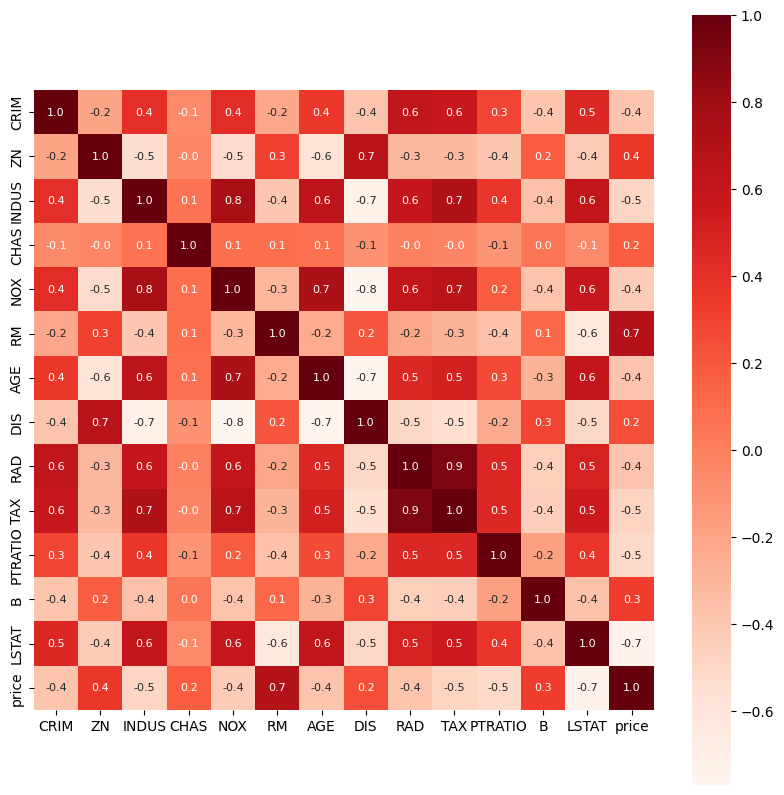

In [21]:
#contructing the heatmap to understand the correlation
plt.figure(figsize=(10,10))

 #cbar means colour bar required or not, fmt means float values required,annot means annotations required ,camp means color of the heat map
sns.heatmap(correlation, cbar= True ,square=True,fmt ='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')


spliiting the data and target

In [23]:
X = house_price_df.drop(['price'],axis=1)
Y = house_price_df['price']

In [24]:
print(X)

        CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...  ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93    0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93    0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [25]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


##splitting into training and testing

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2 , random_state= 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


##model training

Sure! Here's a clear **overview** and the **key points** of the **XGBoost Regressor**:

---

### 📘 **Overview: XGBoost Regressor**
The **XGBoost Regressor** is a machine learning algorithm used for **predicting continuous values**. It is built on the **gradient boosting** technique, which combines the predictions of several weak learners (typically decision trees) to make a strong prediction model. What makes XGBoost special is its focus on **speed, performance, and accuracy** through optimized implementation and regularization.

---

### 📌 **Key Points**
1. **Gradient Boosting Based**:
   - Works by minimizing a loss function (like MSE) through gradient descent in successive trees.

2. **Ensemble Learning**:
   - Combines multiple decision trees, where each new tree tries to fix errors made by previous ones.

3. **Highly Efficient**:
   - Optimized for both memory and computation speed.
   - Supports parallel processing.

4. **Regularization Included**:
   - Has built-in L1 (Lasso) and L2 (Ridge) regularization to reduce overfitting.

5. **Handles Missing Data**:
   - Automatically learns how to handle missing values during training.

6. **Early Stopping**:
   - Can stop training early if validation score doesn’t improve, preventing overfitting.

7. **Custom Objective Functions**:
   - You can define your own loss function for more flexibility.

8. **Feature Importance**:
   - Provides importance scores to understand which features influence predictions most.

9. **Hyperparameter Tuning**:
   - Key ones include:
     - `n_estimators`: number of trees
     - `max_depth`: tree depth
     - `learning_rate`: step size
     - `subsample`, `colsample_bytree`: control sampling
     - `reg_alpha`, `reg_lambda`: L1 & L2 regularization

10. **Popular in Competitions**:
    - Frequently used in Kaggle and other data science contests for its high accuracy.

---


In [28]:
#loading the model
model = XGBRegressor()


In [30]:
#training the model with X_train
model.fit(X_train,Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CHAS: category, RAD: category

🔍 What the Error Means
XGBoost expects the input data (X_train) to contain only columns with data types:

int

float

bool

or category (only if enable_categorical=True)

Your dataset includes categorical columns (CHAS, RAD) of type category, but you haven't told XGBoost to handle them as categorical.

In [32]:
model =XGBRegressor(enable_categorical=True)

In [33]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Evaluation

##prediction on training data

In [41]:

#accuracy for predictin on training data
training_data_predict = model.predict(X_train)

In [36]:
print(training_data_predict)

[23.12537   20.993305  20.101828  34.698845  13.90048   13.498627
 21.999454  15.204494  10.898279  22.683517  13.804576   5.5999727
 29.800287  49.997086  34.899097  20.602865  23.385353  19.18291
 32.698814  19.600945  26.994783   8.395777  46.001015  21.715147
 27.077194  19.379717  19.300058  24.795628  22.610891  31.724024
 18.511816   8.700756  17.401417  23.702253  13.299225  10.512143
 12.678252  24.998468  19.690723  14.897103  24.204836  25.00939
 14.899758  16.997213  15.595185  12.692106  24.50731   15.006159
 50.001972  17.517784  21.202095  31.99562   15.607423  22.901945
 19.320164  18.720781  23.302368  37.205223  30.100294  33.103645
 21.010303  49.99931   13.399545   5.0076556 16.498867   8.398998
 28.66987   19.494442  20.597595  45.400585  39.803585  33.40453
 19.807894  33.4003    25.29777   49.998013  12.523513  17.439049
 18.603155  22.59679   50.004223  23.796879  23.307257  23.081825
 41.711502  16.112608  31.59987   36.09465    7.0044384 20.387278
 20.00197   



## 📘 **1. R-squared Error (R² Score)**

### 🔍 What It Is:
R-squared is a **statistical measure** that explains how well your **regression model** predicts the actual values. It tells you the **percentage of variation** in the output (dependent variable) that is explained by the input (independent variables) used in your model.

### 🧠 Intuition:
Think of R² as an indicator of **how good your model is**:
- R² = 1 → Perfect prediction (model explains all the variation).
- R² = 0 → The model is no better than predicting the average value.
- R² < 0 → The model is worse than predicting the average.

### 📏 How It Works:
It compares your model’s errors to a simple model that just predicts the **mean** of the actual data. If your model performs better than that, R² will be > 0.

### 🔢 Example:
If R² = 0.85, it means **85% of the variation** in the data is explained by your model, and 15% is unexplained (random error or missing variables).

---

## 📘 **2. Mean Absolute Error (MAE)**

### 🔍 What It Is:
MAE is the **average of the absolute differences** between the actual values and the predicted values. It gives a clear idea of **how far off your predictions are**, on average.

### 🧠 Intuition:
If the MAE is **5**, it means your predictions are **off by 5 units** (on average), regardless of direction (above or below).

### 📏 How It Works:
1. Take the difference between actual and predicted values.
2. Convert those differences to absolute values (ignore minus signs).
3. Take the average of all those absolute errors.

### ✔️ Why It’s Useful:
- It’s easy to interpret.
- It gives a real-world scale of the error.
- It’s **not sensitive to outliers** (unlike squared errors).

---

## 🆚 Summary Table

| Metric      | Tells You...                            | Range     | Ideal Value |
|-------------|------------------------------------------|-----------|--------------|
| **R² Score**| % of variation explained by the model    | (-∞, 1]   | Closer to 1  |
| **MAE**     | Average size of prediction errors        | [0, ∞)    | Closer to 0  |

---


In [40]:
# R squared error
score1 = metrics.r2_score(Y_train, training_data_predict)

#mean absolute error
score2 = metrics.mean_absolute_error(Y_train, training_data_predict)


print('r squared error ->', score1)

print('mean absolute error ->', score2)


r squared error -> 0.9999985261877631
mean absolute error -> 0.007722842103183917


visualizing the actual price and predicted price

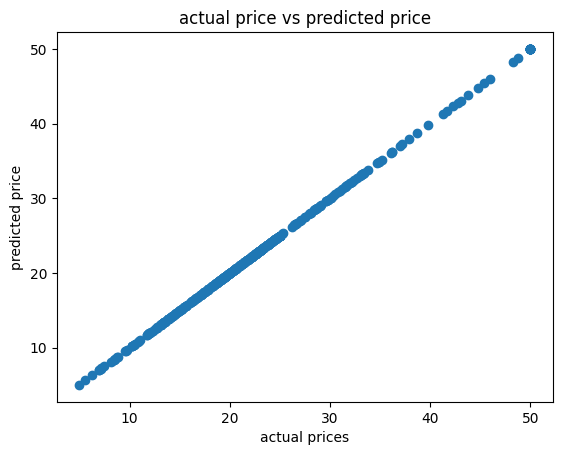

In [47]:
plt.scatter(Y_train,training_data_predict)
plt.xlabel('actual prices')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()

##predcition on test data

In [43]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)


In [45]:
# R squared error
score1 = metrics.r2_score(Y_test, test_data_prediction)

#mean absolute error
score2 = metrics.mean_absolute_error(Y_test, test_data_prediction)


print('r squared error ->', score1)

print('mean absolute error ->', score2)

r squared error -> 0.9110784518505095
mean absolute error -> 2.075374621970981
